# Введение
Задаём входные данные

In [1]:
#Температура пара
temp_vapor = 403  # K
#Температура жидкости
temp_liquid = 333 # K
#Длина тепловой трубы
length = 5 # m
#Внутренний диаметр паропровода
diameter_vapor = 6 # mm
#Внутренний диаметр конденсаторопровода
diameter_liquid = 3 # mm
#Плоский испаритель с площадью подвода тепла
space_input = 100 # mm^2
#Параметр капилярной структуры
molecule_structure0 = 0.037 

Ввод табличных данных для этиленгликоля

In [2]:
temperature = [273, 293, 313, 333, 353, 373, 393, 413, 473, 523] # K
p_s         = [0.000049, 0.00019, 0.00069, 0.0021, 0.0067, 0.021, 0.053, 0.129, 1.013, 4.2] # 10**5 Па
h_ev        = [994, 974, 956, 938, 920, 902, 885, 868, 788, 780] # кДж/кг
p_l         = [1131, 1117, 1101, 1088, 1078, 1059, 1045, 1032, 993, 965] # кг/м^2
p_v         = [0.0016, 0.004, 0.009, 0.021, 0.044, 0.09, 0.17, 0.33, 1.6, 6.7] # кг/м^2
n_l         = [65000, 21000, 9600, 5200, 3200, 2150, 1150, 650, 230, 60] # 10^-6 Па*с
n_v         = [5, 5.35, 5.7, 6.05, 6.4, 6.75, 7.1, 7.45, 8.49, 9.35] # 10^-6 Па*с
c_p_l       = [2295, 2386, 2476, 2565, 2656, 2750, 2830, 2920, 3130,3451] # Дж/кг*К
sygma       = [48.0, 46.0, 44.5, 42.5, 40.5, 38.5, 36.6, 34.6, 28.6, 22.8] # 10^-3 Н/м
lambda_l    = [0.254, 0.257, 0.259, 0.262, 0.265, 0.267, 0.274, 0.278, 0.29, 0.303] # Вт/м*К

Приводим с системе СИ

In [3]:
diameter_vapor = diameter_vapor * 0.001 # m
diameter_liquid = diameter_liquid * 0.001 # m
space_imput = space_input * (0.001**2) # m^2
p_s = [x * (10**5) for x in p_s]
h_ev = [x * 1000 for x in h_ev] # Дж/кг
n_l = [x * (10**-6) for x in n_l] # Па*с
n_v = [x * (10**-6) for x in n_v] # Па*с
sygma = [x * (10**-3) for x in sygma] # Н/м

Выведем данные в виде таблицы и запишем в файл для построения полинома

In [4]:
with open('table_proprieties.txt', 'w') as file:
    for i in range(0,10):
        #print('%f %f %f %f %f %f %f %f %f %f'
        #      % (temperature[i], p_s[i], h_ev[i], p_l[i], p_v[i], n_l[i], 
        #     n_v[i], c_p_l[i], sygma[i], lambda_l[i]), sep='\t', file=file)
        # и выведем в плейбук
        print( '%d %.2e %.2e %.2e %.2e %.2e %.2e %.2e %.2e %.2e' % 
              (temperature[i], p_s[i], h_ev[i], p_l[i], p_v[i], n_l[i], 
              n_v[i], c_p_l[i], sygma[i], lambda_l[i]), sep='\t ')

273 4.90e+00 9.94e+05 1.13e+03 1.60e-03 6.50e-02 5.00e-06 2.30e+03 4.80e-02 2.54e-01
293 1.90e+01 9.74e+05 1.12e+03 4.00e-03 2.10e-02 5.35e-06 2.39e+03 4.60e-02 2.57e-01
313 6.90e+01 9.56e+05 1.10e+03 9.00e-03 9.60e-03 5.70e-06 2.48e+03 4.45e-02 2.59e-01
333 2.10e+02 9.38e+05 1.09e+03 2.10e-02 5.20e-03 6.05e-06 2.56e+03 4.25e-02 2.62e-01
353 6.70e+02 9.20e+05 1.08e+03 4.40e-02 3.20e-03 6.40e-06 2.66e+03 4.05e-02 2.65e-01
373 2.10e+03 9.02e+05 1.06e+03 9.00e-02 2.15e-03 6.75e-06 2.75e+03 3.85e-02 2.67e-01
393 5.30e+03 8.85e+05 1.04e+03 1.70e-01 1.15e-03 7.10e-06 2.83e+03 3.66e-02 2.74e-01
413 1.29e+04 8.68e+05 1.03e+03 3.30e-01 6.50e-04 7.45e-06 2.92e+03 3.46e-02 2.78e-01
473 1.01e+05 7.88e+05 9.93e+02 1.60e+00 2.30e-04 8.49e-06 3.13e+03 2.86e-02 2.90e-01
523 4.20e+05 7.80e+05 9.65e+02 6.70e+00 6.00e-05 9.35e-06 3.45e+03 2.28e-02 3.03e-01


Сделаем абстракцию для расчёта полиномов

In [5]:
import numpy as np
from IPython.display import Latex

class polinome5:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.coeficients = np.polyfit(x,y,5)
    
    def __str__(self):
        text = 'f(x) = '
        counter = 0
        for i in self.coeficients[::-1]:
            text = text + str( '%.3e' % (i)) + ' * X^' + str(counter) + ' + '
            counter += 1
        return text
    
    def latexPrint(self):
        return Latex(r'\begin{eqnarray} f(x) = ' 
            + str( '%.3e' % (self.coeficients[5])) +
        '+' + str( '%.3e' % (self.coeficients[4])) + '* x' +
        '+' + str( '%.3e' % (self.coeficients[3])) + '* x^2' +
        '+' + str( '%.3e' % (self.coeficients[2])) + '* x^3' +
        '+' + str( '%.3e' % (self.coeficients[1])) + '* x^4' +
        '+' + str( '%.3e' % (self.coeficients[5])) + '* x^5' +
        r'\end{eqnarray}')
        
        
    
    def approx_func(self, x):
        a0 = self.coeficients[5]
        a1 = self.coeficients[4]
        a2 = self.coeficients[3]
        a3 = self.coeficients[2]
        a4 = self.coeficients[1]
        a5 = self.coeficients[0]
        
        return a0 + a1*x + a2*(x**2) + a3*(x**3) + a4*(x**4) + a5*(x**5)
            
        
h_ev_poly = polinome5(temperature, h_ev)
h_ev_poly.latexPrint()
#print(h_ev_poly.approx_func(273))

<IPython.core.display.Latex object>

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
x = range(260,540,3)

Проверим полиномы

In [7]:
def table_poly(x):
    a0 = -5.307*10**7
    a1 = 9.204*10**5
    a2 = -6.182*10**3
    a3 = 2.049*10
    a4 = -3.35*10**-2
    a5 = 2.167*10**-5  
        
    return a0 + a1*x + a2*(x**2) + a3*(x**3) + a4*(x**4) + a5*(x**5)

h_ev_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


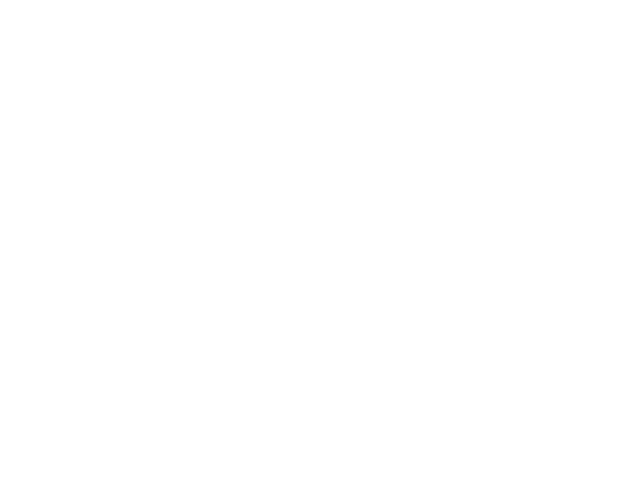

In [8]:
y1 = [h_ev_poly.approx_func(i) for i in x]
y2 = [table_poly(i) for i in x]

line_h_ev_example = plt.plot(temperature, h_ev, 'ro')
line_h_ev_example = plt.plot(x, y1)
line_h_ev_example = plt.plot(x, y2, '--')

Видно, что приведённые в книге полиномы сильноотличаются от расчётных, а значения леат далеко от заданных точек.

## Рассчёт полиномов

In [9]:
def diff_graph(poly, points):
    %matplotlib notebook
    y = [poly.approx_func(i) for i in x]
    area = plt.plot(temperature, points, 'ro')
    arae = plt.plot(x, y)
    

In [10]:
%%latex
$$ln(P_s),Па$$

<IPython.core.display.Latex object>

In [11]:
ln_ps = [np.log(x) for x in p_s]
ln_ps_poly = polinome5(temperature,ln_ps)
ln_ps_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


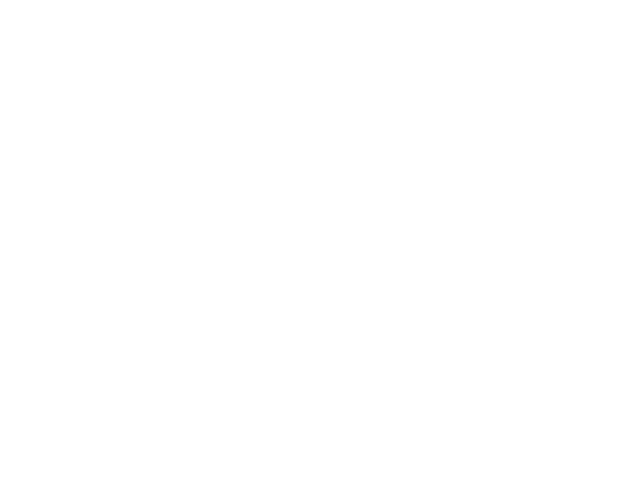

In [12]:
diff_graph(ln_ps_poly, ln_ps)

In [13]:
%%latex
$$H_{ev},Дж/кг$$

<IPython.core.display.Latex object>

In [14]:
h_ev_poly = polinome5(temperature, h_ev)
h_ev_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


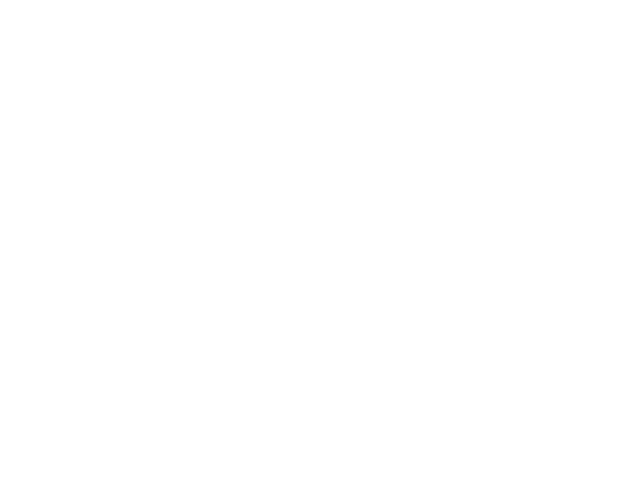

In [15]:
diff_graph(h_ev_poly, h_ev)

In [16]:
%%latex
$$\rho_l,кг/м^3$$

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


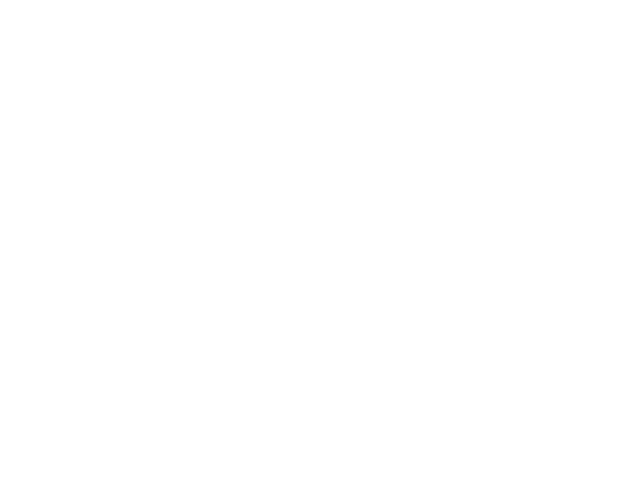

In [17]:
p_l_poly = polinome5(temperature, p_l)
p_l_poly.latexPrint()

%matplotlib notebook
diff_graph(p_l_poly, p_l)

In [18]:
%%latex
$$ln(\rho_v),кг/м^3$$

<IPython.core.display.Latex object>

In [19]:
ln_pv = [np.log(x) for x in p_v]
ln_pv_poly = polinome5(temperature,ln_pv)
ln_pv_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


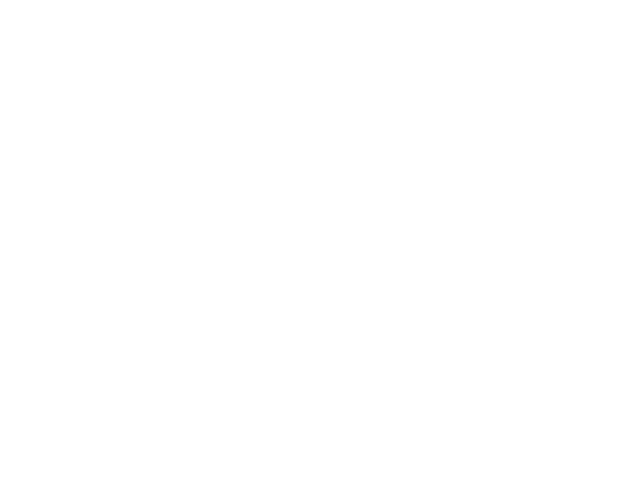

In [20]:
diff_graph(ln_pv_poly, ln_pv)

In [21]:
%%latex
$$ln(\eta_l),Па*с$$

<IPython.core.display.Latex object>

In [22]:
ln_nl = [np.log(x) for x in n_l]
ln_nl_poly = polinome5(temperature,ln_nl)
ln_nl_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


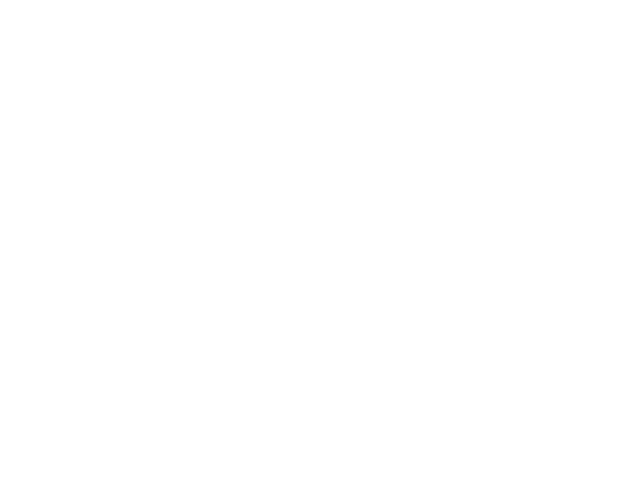

In [23]:
%matplotlib notebook

diff_graph(ln_nl_poly, ln_nl)

In [24]:
%%latex
$$\eta_v,Па*с$$

<IPython.core.display.Latex object>

In [25]:
n_v_poly = polinome5(temperature, n_v)
n_v_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


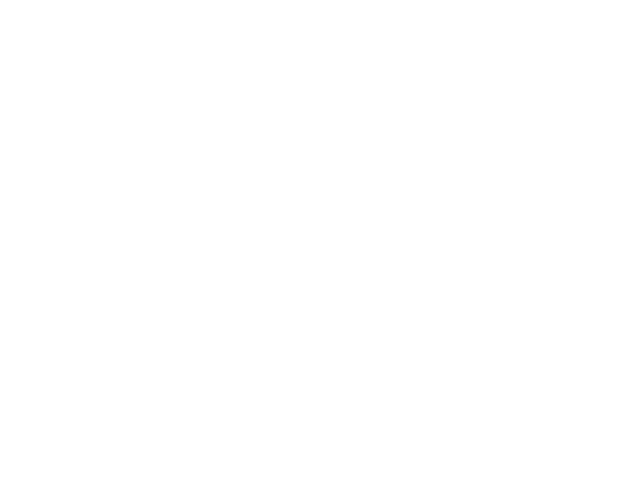

In [26]:
%matplotlib notebook

diff_graph(n_v_poly, n_v)

In [27]:
%%latex
$$c_{p,l},Дж/кг*К$$

<IPython.core.display.Latex object>

In [28]:
c_p_l_poly = polinome5(temperature, c_p_l)
c_p_l_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


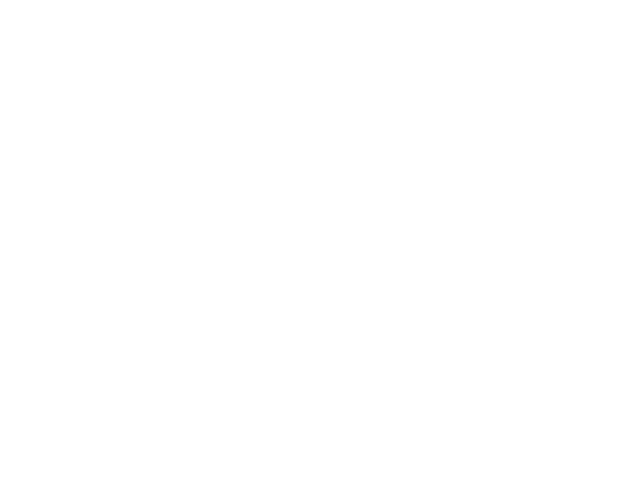

In [29]:
diff_graph(c_p_l_poly, c_p_l)

In [30]:
%%latex
$$\sigma,Н/м$$

<IPython.core.display.Latex object>

In [31]:
sygma_poly = polinome5(temperature, sygma)
sygma_poly.latexPrint()

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


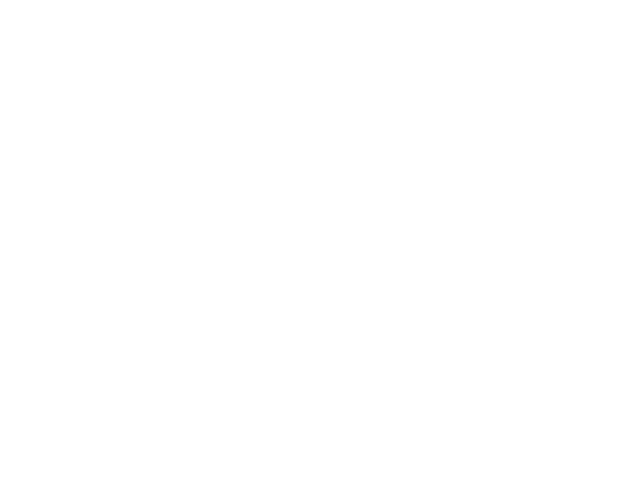

In [32]:
diff_graph(sygma_poly, sygma)

In [33]:
%%latex
$$\lambda_l,Вт/м*К$$

<IPython.core.display.Latex object>

In [34]:
lambda_l_poly = polinome5(temperature, lambda_l)
lambda_l_poly.latexPrint()

<IPython.core.display.Latex object>

In [35]:
diff_graph(lambda_l_poly, lambda_l)

<IPython.core.display.Javascript object>

Опишем функции для формул коэффициентов (B, E, C, D, Re)

In [ ]:
import math
Sks = math.pi * (diameter_liquid ** 2 - diameter_vapor ** 2 ) * 0.25
def B(Tc, Tv):
    return n_l_poly(Tc) / (p_l_poly(Tc) * h_ev_poly(Tv) * molecule_structure0 * Sks)

In [39]:
%%latex
$$B = \eta_l(T_c) * \frac{1}{\rho_l(T_c) * H_{ev}(T_v)*K_0*S_{ks}}$$

<IPython.core.display.Latex object>

In [40]:
def E(Tv):
    return 128 * n_v_poly(Tv) / (p_v_poly(Tv) * h_ev_poly(Tv) * math.pi * diameter_vapor ** 4) 

In [43]:
%%latex
$$E = 128 * \frac{\eta_v(T_v)}{\rho_v(T_v) * H_{ev}(T_v) * \pi * d_v^4}$$

<IPython.core.display.Latex object>

In [44]:
def Re(QL, Tv):
    return 4 * QL / (math.pi * n_v_poly(Tv) * h_ev_poly(Tv) * diameter_vapor * length )

In [45]:
%%latex
$$R_e(QL) = 4 * \frac{QL}{\pi * \eta_v(T_v) * H_{ev}(T_v)*d_v*L} $$

<IPython.core.display.Latex object>

In [46]:
def C(QL, Tv):
    return 0.6328 * Re(QL, Tv) ** 0.75 * n_v_poly(Tv) / (p_v_poly(Tv) * h_ev_poly(Tv) * math.pi * diameter_vapor ** 4)

In [49]:
%%latex
$$C = 0.6328 * R_e(QL)^{0.75} * \frac{\eta_v(T_v)}{\rho_v(T_v) * H_{ev}(T_v)*\pi*d_v^4} $$

<IPython.core.display.Latex object>

In [50]:
def D(Tl):
    return 128.0 * n_l_poly(Tl) / (p_l_poly(Tl)*h_ev_poly(Tl)*math.pi*diameter_liquid**4)

In [51]:
%%latex
$$D = 128 * \frac{\eta_l(T_l)}{\rho_l(T_l)*H_{ev}(T_l)*\pi*d_l^4} $$

<IPython.core.display.Latex object>